<a href="https://colab.research.google.com/github/NishitPatel29/16-bit-alpha-cpu/blob/main/Bank_Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Bank Customer Churn Model**









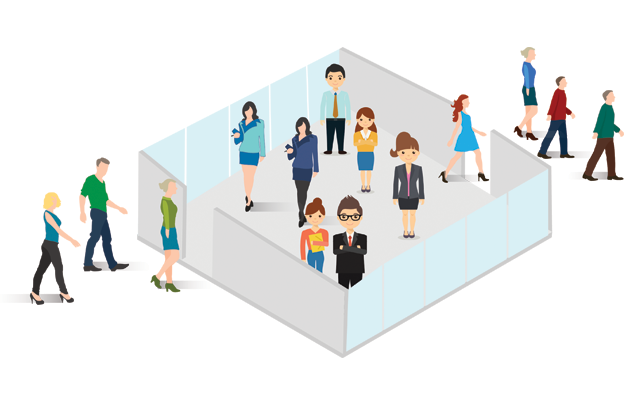

# **Learning Objective**

1. Data Encoding
2. Feature Scaling
3. Handling Imbalance Data

        *   Random Under Sampling
        *   Random Over Sampling
4. Support Vector Machine Classifier
5. Grid Search for Hyperparameter Tunning










# Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

#  Import Data

In [5]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.duplicated('CustomerId').sum()

np.int64(0)

In [9]:
df = df.set_index('CustomerId')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Encoding

In [11]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [12]:
df.replace({'Geography': {'France': 2, 'Germany': 1, 'Spain':0}}, inplace=True)

<ipython-input-12-7c660cc47f9c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography': {'France': 2, 'Germany': 1, 'Spain':0}}, inplace=True)


In [13]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [14]:
df.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)

<ipython-input-14-c3dddf66a94b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)


In [15]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [16]:
df.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [17]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [18]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [19]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [20]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

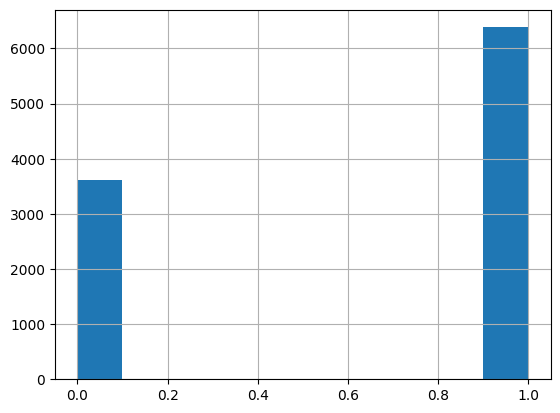

In [21]:
df['Zero Balance'].hist()

In [22]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define Label and Features

In [23]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [24]:
X = df.drop(['Surname', 'Churn'], axis = 1)

In [25]:
y = df['Churn']

In [26]:
X.shape, y.shape

((10000, 11), (10000,))

# **Handling Imbalance Data**
  

  class Imbalance is a common problem in machine learning, especially in classification problems as machine learning algorithms are designed to maximize accuracy and reduse erros. if the data set is imbalance then in such cases, just by predicting the majority class we get a pretty high accuacy, but fails to capture the minority class, which is most often the point of creating the model in the first place. like in

      1. Fraud detection
      2. Spam filtering
      3. Disease screening
      4. Online sales churn
      5. Advertising click-throughs



### **Undersampling** can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

### Undersampling can be a good choice when you have a ton of data think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

### in under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss od information.

### A drawback to consider when undersampling is that it can cause overfiting and poor generalization to your test set.

### **Oversampling** can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don't have a ton of data to work with.

### The simplest implementation of over-sampling is to duplicate random records from minority class, which can cause overfiting.

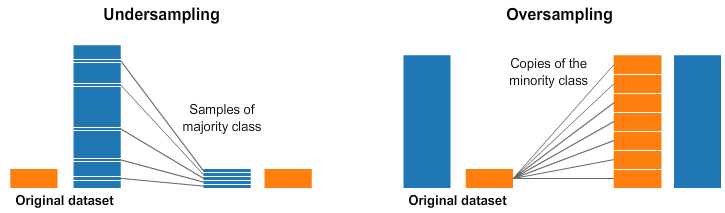

In [27]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


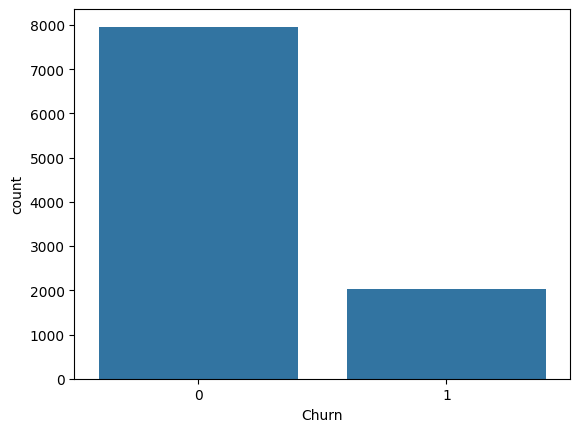

In [28]:
sns.countplot(x = 'Churn', data = df);

In [29]:
X.shape, y.shape

((10000, 11), (10000,))

# **Random Under Sampling**

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
rus = RandomUnderSampler(random_state=2529)

In [32]:
X_rus, y_rus = rus.fit_resample(X, y)

In [33]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [34]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [35]:
y_rus.value_counts()

,count
Churn,
0,2037
1,2037


<Axes: ylabel='Frequency'>

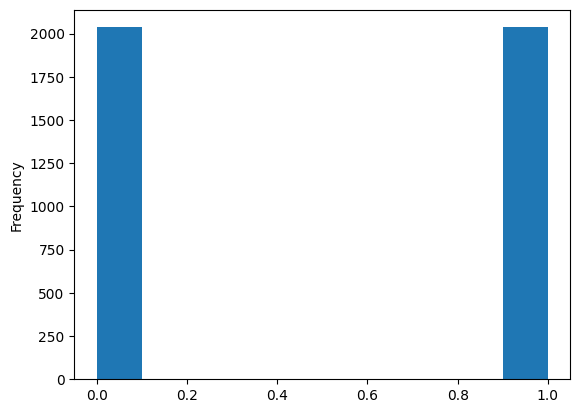

In [36]:
y_rus.plot(kind = 'hist')

# **Random Over Sampling**

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
ros = RandomOverSampler(random_state=2529)

In [39]:
X_ros, y_ros = ros.fit_resample(X, y)

In [40]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [41]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [42]:
y_ros.value_counts()

,count
Churn,
1,7963
0,7963


<Axes: ylabel='Frequency'>

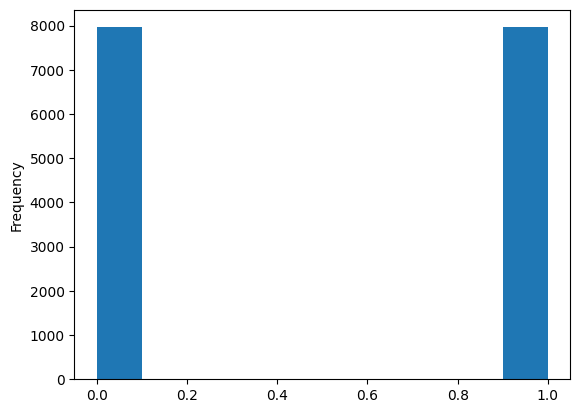

In [43]:
y_ros.plot(kind = 'hist')

# **Train Test Split**

In [44]:
from sklearn.model_selection import train_test_split

# **Split Original Data**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529);

# **Split Random Under Sample Data**

In [46]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=2529);

In [47]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=2529);

# **Standardize Features**

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler()

# **Standardize Original Data**

In [50]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]);

In [51]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]);

# **Standardize Random Under Sample Data**

In [52]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]);

In [53]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]);

# **Standardize Random Over Sample Data**

In [54]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]);

In [55]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]);

# **Support Vector Machine Classifier**

In [56]:
from sklearn.svm import SVC

In [57]:
svc = SVC()

In [58]:
svc.fit(X_train, y_train)

SVC()

In [59]:
y_pred = svc.predict(X_test)

# **Model Accuracy**

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
confusion_matrix(y_test, y_pred)

array([[2381,   33],
       [ 436,  150]])

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



# **Hyperparameter Tunning**

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'C': [0.1,1, 10],
             'gamma': [1,0.1,0.01],
             'kernel': ['rbf'],
             'class_weight': ['balanced']}

In [65]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [66]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [67]:
grid_predictions = grid.predict(X_test)

In [68]:
confusion_matrix(y_test,grid_predictions)

array([[2159,  255],
       [ 343,  243]])

In [69]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



# **Model with Random Under Sampling**

In [70]:
svc_rus = SVC()

In [71]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [72]:
y_pred_rus = svc_rus.predict(X_test_rus)

# **Model Accuracy**

In [73]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[470, 157],
       [174, 422]])

In [74]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



# **Hyperparameter Tunning**

In [75]:
pram_grid = {'C': [0.1,1, 10],
             'gamma': [1,0.1,0.01],
             'kernel': ['rbf'],
             'class_weight': ['balanced']}

In [76]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [77]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [78]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [79]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[476, 151],
       [172, 424]])

In [80]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



# **Modelwith Random Over Sampling**

In [81]:
svc_ros = SVC()

In [82]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [83]:
y_pred_ros = svc_ros.predict(X_test_ros)

# **Model Accuracy**

In [84]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [85]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



# **Hyperparameter Tunning**

In [86]:
pram_grid = {'C': [0.1,1, 10],
             'gamma': [1,0.1,0.01],
             'kernel': ['rbf'],
             'class_weight': ['balanced']}

In [87]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [88]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [89]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [90]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]])

In [91]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



# **Lets Compare**

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [93]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [94]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [95]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778

